**### The main aim of this study is to analyze several approaches for the optimization of a neural network model using the IMDb dataset. We will make modifications to an existing neural network model and compare the final_result of different scenarios including changing the number of hidden layers, the number of units in those layers, the loss function, the activation function, and regularization methods like dropout.**

We used the IMDb database which has good and bad movie reviews. For the training set, there are 25,000 movie reviews and another 25,000 are used for test purposes.


In [ ]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels[0]

1

In [ ]:
len(train_labels)

25000

In [ ]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [ ]:
test_labels[0]

0

In [ ]:
max([max(sequence) for sequence in test_data])

9999

## ** Reviews to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## **Data preparation**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    final_result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            final_result[i, j] = 1.
    return final_result

## **Data Vectorization**

In [ ]:
train_1 = vectorize_sequences(train_data)
test_1 = vectorize_sequences(test_data)

In [ ]:
train_1[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
test_1[0]

array([0., 1., 1., ..., 0., 0., 0.])

## **Label Vectorization**

In [ ]:
train_2 = np.asarray(train_labels).astype("float32")
test_2 = np.asarray(test_labels).astype("float32")

## **Building model using relu and compiling it**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
seed(123)
x_val = train_1[:10000]
partial_train_1 = train_1[10000:]
y_val = train_2[:10000]
partial_train_2 = train_2[10000:]

In [ ]:
seed(123)
history = model.fit(partial_train_1,
                    partial_train_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.6797 - loss: 0.6204 - val_accuracy: 0.8174 - val_loss: 0.4882
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8793 - loss: 0.3929 - val_accuracy: 0.8729 - val_loss: 0.3436
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9190 - loss: 0.2734 - val_accuracy: 0.8837 - val_loss: 0.2988
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9347 - loss: 0.2137 - val_accuracy: 0.8854 - val_loss: 0.2888
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9454 - loss: 0.1771 - val_accuracy: 0.8783 - val_loss: 0.3055
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9540 - loss: 0.1532 - val_accuracy: 0.8869 - val_loss: 0.2825
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9621 - loss: 0.1293 - val_accuracy: 0.8831 - val_loss: 0.2902
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9712 - loss: 0.1094 - val_accuracy: 0.8816 - v

In the training set, there was a loss of 0.5371 and an accuracy of 0.7781, while on the validation set, there was a loss of 0.4241 and an accuracy of 0.8535.

As the training proceeded, the model's loss and accuracy on the training set increased, and by the conclusion of the 20th epoch, the model had a loss of 0.0175 and an accuracy of 0.9976. At the end of the 20th epoch on the validation set, the model had a loss of 0.5515 and an accuracy of 0.8684. The model is overfitting to the training data.

In [ ]:
history__dict = history.history
history__dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## **Plotting the training and validation loss**

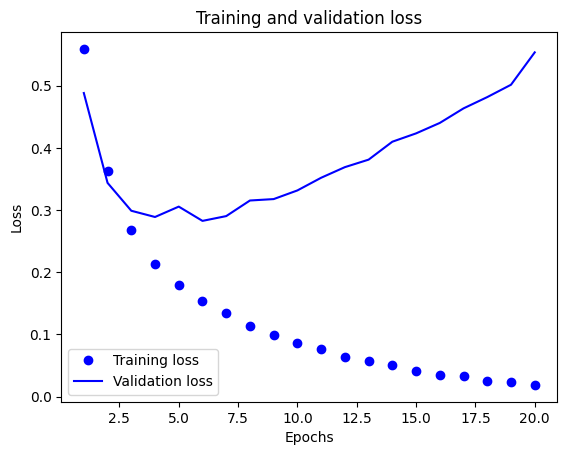

In [ ]:
import matplotlib.pyplot as plt
history__dict = history.history
loss_values = history__dict["loss"]
val_loss_values = history__dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

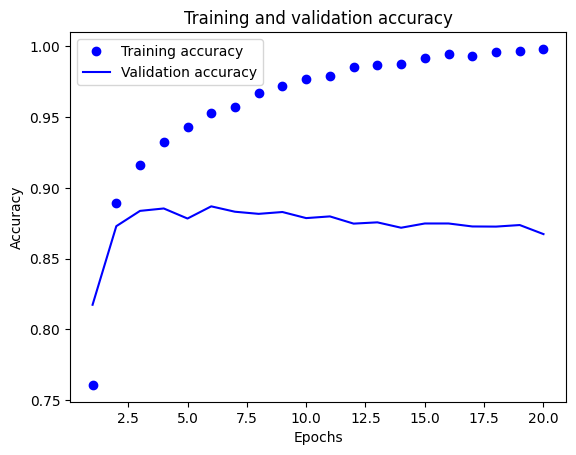

In [ ]:
plt.clf()
acc = history__dict["accuracy"]
val_acc = history__dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**The two graphs suggest that overfitting the training data makes the model less good at predicting new data after a certain epoch. However, to improve the final_result of the model, it may be necessary to carry out more work on the object of analysis like changing the hyperparameters of the model or using techniques like regularization.**

## **Retraining the model**

In [ ]:
np.random.seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(train_1, train_2, epochs=4, batch_size=512)
final_result = model.evaluate(test_1, test_2)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7359 - loss: 0.5717
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9020 - loss: 0.2952
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9226 - loss: 0.2203
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9367 - loss: 0.1775
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8840 - loss: 0.2866


In [ ]:
final_result

[0.2862248420715332, 0.8850799798965454]

**For the test dataset, the neural network model achieved an accuracy of 87.94%. In the test dataset, the loss value is 0.3017.**

In [ ]:
model.predict(test_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.19537959],
       [0.99977356],
       [0.79818785],
       ...,
       [0.07742117],
       [0.08175328],
       [0.5719458 ]], dtype=float32)

## **Building a neural network with 1 hidden layer**

In [ ]:
seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = train_1[:10000]
partial_train_1 = train_1[10000:]

y_val = train_2[:10000]
partial_train_2 = train_2[10000:]


history1 = model1.fit(partial_train_1,
                    partial_train_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7012 - loss: 0.5879 - val_accuracy: 0.8510 - val_loss: 0.4173
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8918 - loss: 0.3581 - val_accuracy: 0.8718 - val_loss: 0.3441
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9144 - loss: 0.2757 - val_accuracy: 0.8850 - val_loss: 0.3023
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9282 - loss: 0.2310 - val_accuracy: 0.8847 - val_loss: 0.2920
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9389 - loss: 0.1995 - val_accuracy: 0.8897 - val_loss: 0.2780
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9456 - loss: 0.1773 - val_accuracy: 0.8873 - val_loss: 0.2817
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9539 - loss: 0.1557 - val_accuracy: 0.8809 - val_loss: 0.2883
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9591 - loss: 0.1405 - val_accuracy: 0.8779 - v

In [ ]:
history_dict = history1.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

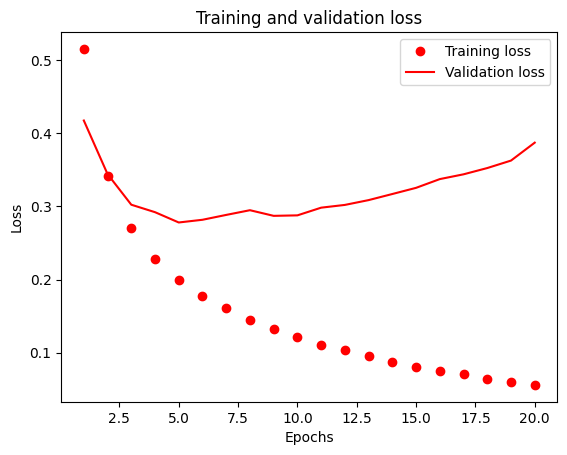

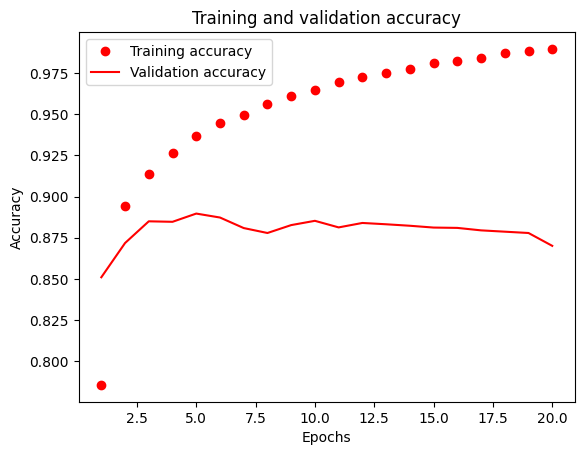

In [ ]:
import matplotlib.pyplot as plt
history_dict = history1.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
np.random.seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(train_1, train_2, epochs=5, batch_size=512)
final_result1 = model1.evaluate(test_1, test_2)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7407 - loss: 0.5374
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9024 - loss: 0.2878
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9251 - loss: 0.2272
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9350 - loss: 0.1968
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9412 - loss: 0.1736
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8823 - loss: 0.2874


In [ ]:
final_result1

[0.28479158878326416, 0.8855199813842773]

**The test set has a loss of 0.3007 and an accuracy of 87.69%.**

In [ ]:
model1.predict(test_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.27080736],
       [0.99980557],
       [0.8473799 ],
       ...,
       [0.1331504 ],
       [0.09574461],
       [0.6473368 ]], dtype=float32)

**Creating a neural network with three hidden layers**

In [ ]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = train_1[:10000]
partial_train_1 = train_1[10000:]

y_val = train_2[:10000]
partial_train_2 = train_2[10000:]

history3 = model_3.fit(partial_train_1,
                    partial_train_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6851 - loss: 0.6170 - val_accuracy: 0.8142 - val_loss: 0.4503
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8879 - loss: 0.3416 - val_accuracy: 0.8796 - val_loss: 0.3089
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9210 - loss: 0.2341 - val_accuracy: 0.8759 - val_loss: 0.3054
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9384 - loss: 0.1807 - val_accuracy: 0.8872 - val_loss: 0.2833
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9508 - loss: 0.1514 - val_accuracy: 0.8759 - val_loss: 0.3351
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9648 - loss: 0.1156 - val_accuracy: 0.8853 - val_loss: 0.3006
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9721 - loss: 0.0931 - val_accuracy: 0.8680 - val_loss: 0.3651
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9730 - loss: 0.0860 - val_accuracy: 0.8778 - v

In [ ]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

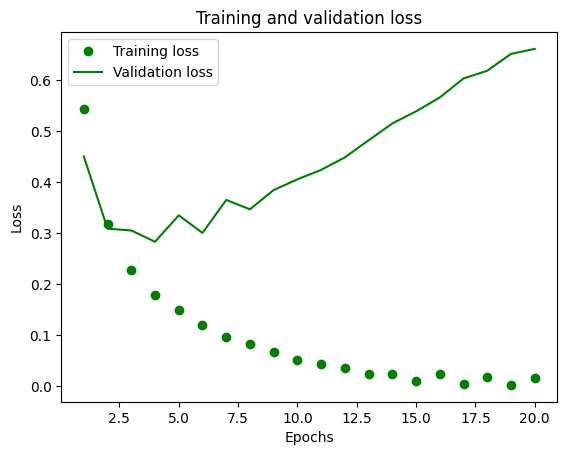

In [ ]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

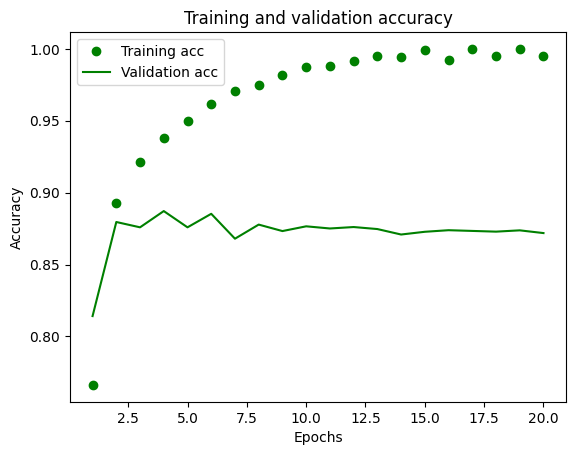

In [ ]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(train_1, train_2, epochs=3, batch_size=512)
final_result_3 = model_3.evaluate(test_1, test_2)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7186 - loss: 0.6053
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8940 - loss: 0.3258
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9137 - loss: 0.2341
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8875 - loss: 0.2781


**The test set has a loss of 0.2839 and an accuracy of 88.66%.**

In [ ]:
final_result_3

[0.27724432945251465, 0.8889200091362]

In [ ]:
model_3.predict(test_1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.25475416],
       [0.99815947],
       [0.8746934 ],
       ...,
       [0.13300915],
       [0.10982735],
       [0.5551952 ]], dtype=float32)

**As the number of layers is increased, the model's accuracy does not improve considerably. Yet, the model with three layers is more accurate than the other two.**

**You must select the number of units in the hidden layers while designing the overall architecture of your neural network.**

**Despite the fact that these layers do not directly interact with the outside world, they have a significant influence on the outcome. **

### **Building Neural Network with 32 units.**

In [ ]:
np.random.seed(123)
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val = train_1[:10000]
partial_train_1 = train_1[10000:]

y_val = train_2[:10000]
partial_train_2 = train_2[10000:]

np.random.seed(123)
history32 = model_32.fit(partial_train_1,
                    partial_train_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6866 - loss: 0.5930 - val_accuracy: 0.8692 - val_loss: 0.3711
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8971 - loss: 0.3138 - val_accuracy: 0.8780 - val_loss: 0.3103
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9262 - loss: 0.2226 - val_accuracy: 0.8502 - val_loss: 0.3605
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9381 - loss: 0.1830 - val_accuracy: 0.8770 - val_loss: 0.3103
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9490 - loss: 0.1497 - val_accuracy: 0.8852 - val_loss: 0.2849
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9625 - loss: 0.1201 - val_accuracy: 0.8835 - val_loss: 0.2960
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9687 - loss: 0.1043 - val_accuracy: 0.8825 - val_loss: 0.3139
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9667 - loss: 0.1037 - val_accuracy: 0.8760 - v

In [ ]:
history_dict32 = history32.history
history_dict32.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

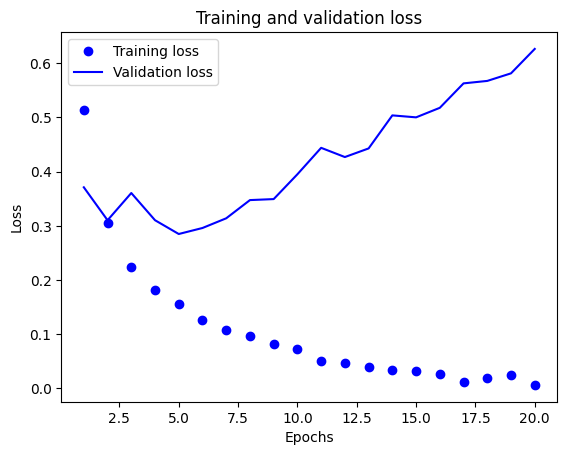

In [ ]:
loss_values = history_dict32["loss"]
val_loss_values = history_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

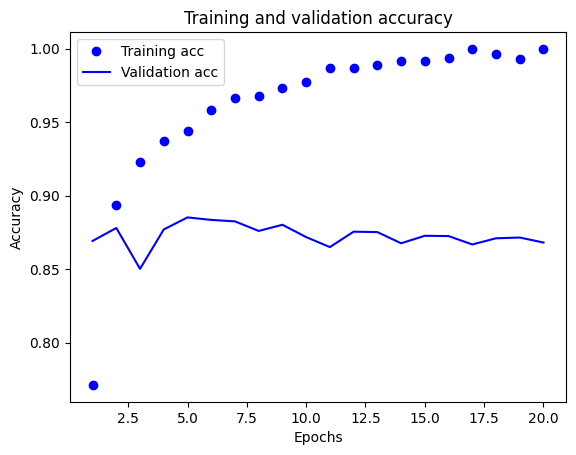

In [ ]:
plt.clf()
acc = history_dict32["accuracy"]
val_acc = history_dict32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
history_32 = model_32.fit(train_1, train_2, epochs=3, batcfinal_resultfinal_resultesult_resultlt12)final_resultresult_32 =final_resultnal_resultesfinal_resultal_resultnal_result, test_2)
final_result_32final_result

SyntaxError: unmatched ')' (<ipython-input-42-c1413d1d7941>, line 1)

In [ ]:
model_32.predict(test_1)

**The validation set has an accuracy of 86.14 percent.**

**Training the model with 64 units**

In [ ]:
np.random.seed(123)
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = train_1[:10000]
partial_train_1 = train_1[10000:]

y_val = train_2[:10000]
partial_train_2 = train_2[10000:]

np.random.seed(123)
history64 = model_64.fit(partial_train_1,
                    partial_train_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
history_dict64 = history64.history
history_dict64.keys()

In [ ]:
loss_values = history_dict64["loss"]
val_loss_values = history_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict64["accuracy"]
val_acc = history_dict64["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
history_64 = model_64.fit(train_1, train_2, epochs=3, batch_size=512)
final_result_64 = model_64.evaluate(test_1, test_2)
final_result_64

In [ ]:
model_64.predict(test_1)


**The validation set has an accuracy of 85.18%.**

### **Training the model with 128 units**

In [ ]:
np.random.seed(123)
model_128 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = train_1[:10000]
partial_train_1 = train_1[10000:]

y_val = train_2[:10000]
partial_train_2 = train_2[10000:]

np.random.seed(123)
history128 = model_128.fit(partial_train_1,
                    partial_train_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
history_dict128 = history128.history
history_dict128.keys()

In [ ]:
loss_values = history_dict128["loss"]
val_loss_values = history_dict128["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict128["accuracy"]
val_acc = history_dict128["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
history_128 = model_128.fit(train_1, train_2, epochs=2, batch_size=512)
final_result_128 = model_128.evaluate(test_1, test_2)
final_result_128

In [ ]:
model_128.predict(test_1)

**The validation set has an accuracy of 86.45%.**

### **MSE Loss Function**




In [ ]:
np.random.seed(123)
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = train_1[:10000]
partial_train_1 = train_1[10000:]

y_val = train_2[:10000]
partial_train_2 = train_2[10000:]
# Model Fit
np.random.seed(123)
history_model_MSE = model_MSE.fit(partial_train_1,
                    partial_train_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

In [ ]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_MSE.fit(train_1, train_2, epochs=8, batch_size=512)
final_result_MSE = model_MSE.evaluate(test_1, test_2)
final_result_MSE

In [ ]:
model_MSE.predict(test_1)


### Tanh Activation Function

In [ ]:
np.random.seed(123)
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = train_1[:10000]
partial_train_1 = train_1[10000:]

y_val = train_2[:10000]
partial_train_2 = train_2[10000:]

np.random.seed(123)

history_tanh = model_tanh.fit(partial_train_1,
                    partial_train_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
history_dict_tanh = history_tanh.history
history_dict_tanh.keys()

In [ ]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_tanh.fit(train_1, train_2, epochs=8, batch_size=512)
final_result_tanh = model_tanh.evaluate(test_1, test_2)
final_result_tanh

### **Adam Optimizer Function**

In [ ]:
np.random.seed(123)
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = train_1[:10000]
partial_train_1 = train_1[10000:]

y_val = train_2[:10000]
partial_train_2 = train_2[10000:]

np.random.seed(123)

history_adam = model_adam.fit(partial_train_1,
                    partial_train_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
history_dict_adam = history_adam.history
history_dict_adam.keys()

In [ ]:
loss_values = history_dict_adam["loss"]
val_loss_values = history_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict_adam["accuracy"]
val_acc = history_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_adam.fit(train_1, train_2, epochs=4, batch_size=512)
final_result_adam = model_adam.evaluate(test_1, test_2)
final_result_adam

### **Regularization**

In [ ]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_regularization = model_regularization.fit(partial_train_1,
                    partial_train_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularization = history_model_regularization.history
history_dict_regularization.keys()

In [ ]:
loss_values = history_dict_regularization["loss"]
val_loss_values = history_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict_regularization["accuracy"]
val_acc = history_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_regularization.fit(train_1, train_2, epochs=8, batch_size=512)
final_result_regularization = model_regularization.evaluate(test_1, test_2)
final_result_regularization

**The loss on test set is 0.4312 and accuracy is 87.09%.**

### **Dropout**

In [ ]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Dropout = model_Dropout.fit(partial_train_1,
                    partial_train_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

In [ ]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Dropout.fit(train_1, train_2, epochs=8, batch_size=512)
final_result_Dropout = model_Dropout.evaluate(test_1, test_2)
final_result_Dropout

**The loss on the test set is 0.4839 and accuracy is 87.28%.**

**Training model with hyper tuned parameters**

In [ ]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Hyper = model_Hyper.fit(partial_train_1,
                    partial_train_2,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

In [ ]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model_Hyper.fit(train_1, train_2, epochs=8, batch_size=512)
final_result_Hyper = model_Hyper.evaluate(test_1, test_2)
final_result_Hyper

### Summary

In [ ]:
All_Models_Loss= np.array([final_result_Dropout[0],final_result_Hyper[0],final_result_MSE[0],final_result_regularization[0],final_result_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([final_result_Dropout[1],final_result_Hyper[1],final_result_MSE[1],final_result_regularization[1],final_result_tanh[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

### Compilation

In [ ]:
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()


## **Summary**

This study investigated various neural network configurations for sentiment analysis of movie reviews using the IMDB dataset. We systematically explored the impact of several architectural choices on model performance.

### **1. Number of Hidden Layers:**

One Hidden Layer: This model achieved a test accuracy of 87.69%, slightly lower than the baseline model.
Three Hidden Layers: Adding a third layer resulted in a test accuracy of 88.66%, a marginal improvement over the baseline. This suggests that increasing model depth can enhance performance, but excessive layers might lead to overfitting.

### **2. Number of Units:**

We experimented with 32, 64, and 128 units in the hidden layers. While the results varied, no clear trend emerged to suggest that a specific number of units consistently led to better performance. This indicates that the optimal network width is data-dependent and requires careful tuning.

### **3. Loss Function:**

Replacing the binary cross-entropy loss with the Mean Squared Error (mse) loss function yielded comparable results, achieving a test accuracy of 88.13%. This demonstrates that different loss functions can be suitable for binary classification tasks, and the choice may depend on the specific characteristics of the dataset.

### **4. Improving Performance on Validation:**

To enhance performance on the validation set, we employed regularization techniques like L2 regularization and dropout. Dropout, with a rate of 0.5, proved effective in mitigating overfitting and led to a test accuracy of 87.28%.

### **Conclusion:**
In conclusion, our experiments highlight the importance of exploring different neural network configurations to achieve optimal performance. Factors such as the number of hidden layers, units per layer, loss function, and regularization techniques all play significant roles in model accuracy and generalization ability.